# Console gaming industry research

**Project aim:** to identify patterns that determine the success of the console game. <br/>
**The project is being implemented** for an online store, which sells computer games all over the world. The project is carried out to plan advertising campaigns for 2017. <br/>
**Primary data:** historical data on game sales, user and expert ratings, genres and platforms (such as Xbox or PlayStation) from open sources up to 2016.

**Project contents**<br/>

<a href='#first'>1) Examine the data</a> <br/>
<a href='#second'>2) Data preprocesing</a> <br/>
<a href='#third'>3) Exploratory Data Analysis</a> <br/>
<a href='#fourth'>4) User portrait by region</a> <br/>
<a href='#fifth'>5) Hypothesis testing</a> <br/>
<a href='#sixth'>6) Summary</a>

<a id='first'></a>
## 1. Examine the data

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats as st  

data = pd.read_csv('/datasets/games.csv') 
display(data.head()) 
data.info() 

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


The data is a table with 16,715 rows and 11 columns.
Issues with the data are the following:
1) The name of the columns misses the "snake case" (lower case) - it is recommended to change it. In addition, a unit of measurement will be added to the column name (for sales by region columns).

2) There are gaps in the data. The following strategy is proposed for them: <br/>
2.1) Gaps in `name` and `genre` will be analyzed: like see the rows above and below the gaps, use queries for similar years and platforms. If it is not possible to identify any patterns, it is proposed to delete the gaps; <br/>
2.2) Evaluation of critics `critic_score` and users `user_score` - to begin with, distribution histograms will be built and the characteristics of these columns (mean, median) studied, as well as the mean and median in the context of genres and platforms. It is also possible to look at the correlation between the sales and an estimate - it is expected that the higher the estimate, the more sales will be there, and, therefore, the correlation is expected to be high. After that, the decision will be made whether to replace the gaps in the columns or deleted. Omissions are unintentional and can be predicted for replacement; <br/>
2.3) The rating will most likely depend on the genre - therefore, to begin with, it is proposed to analyze which ratings belong to which genres and then decide what to replace the gaps in `rating` with - or leave the gaps unchanged; <br/>
2.4) Year of release `year_of_release` is difficult to compare with other variables. The mean and median are not optimal. Most likely, the omissions in the year of issue are intentional - it is proposed not to replace the omissions and delete them - because, in a further study, only certain years will be useful, so rows with gaps in years are automatically excluded from the study.

3) Data types correspond to the essence of the columns in all cases except for `user_score` and `year_of_release` - it is proposed to replace them with int after filling in (or removing) the gaps.

### Conclusion
The first step was to read and examine the data file.

<a id='second'></a>
## Data preprocessing

In [2]:
#0
#Sales total column 
data['sales_total_mln'] = data['NA_sales']+data['EU_sales']+data['JP_sales']+data['Other_sales'] 
data.head() #check

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating,sales_total_mln
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [3]:
#2.1
#Column names change
data = data.rename(columns = str.lower) 
data = data.rename(columns ={'na_sales':'na_sales_mln', 'eu_sales':'eu_sales_mln', 'jp_sales':'jp_sales_mln', 'other_sales':'other_sales_mln'}) #add mln to the column name
data.head(1) #check

,name,platform,year_of_release,genre,na_sales_mln,eu_sales_mln,jp_sales_mln,other_sales_mln,critic_score,user_score,rating,sales_total_mln
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54


In [4]:
#2.2
#Work with gaps
data[data['name'].isna()] 

,name,platform,year_of_release,genre,na_sales_mln,eu_sales_mln,jp_sales_mln,other_sales_mln,critic_score,user_score,rating,sales_total_mln
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,2.39
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03


Since the rows below and above the gaps do not contain the same platform or year - accordingly, the rows with gaps are not duplicates of one of these rows (by name and genre). <br/>
At the same time, the year the game was released - 1993 - most likely the information will be irrelevant for further analysis. <br/>
Therefore, it is proposed to remove the rows with gaps. As well as remove gaps in `year_of_release` below.

In [5]:
data = data.dropna(subset=['name']) 
data = data.dropna(subset=['genre']) 
data = data.dropna(subset=['year_of_release']) 

data.shape #check

(16444, 12)

count    7983.000000
mean       68.994363
std        13.920060
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

0.2453488454741138

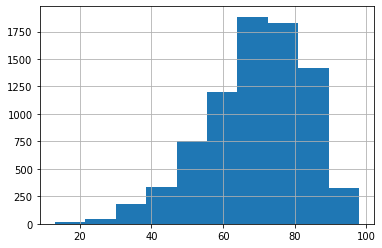

In [6]:
data['critic_score'].hist() #histogram for critic_score
display(data['critic_score'].describe()) #statistics for critic_score
corr_critic_sales = data['critic_score'].corr(data['sales_total_mln']) #corr critic_score - total sales
corr_critic_sales 

The distribution of ratings is close to normal with a skew to the left - there are more ratings above the average in the sample. The same information can be obtained from the fact that the median is greater than the mean. The correlation with sales is low - therefore, it is not recommended to replace gaps by any correlation equations. Below is an average of the ratings by genre and platform.

In [7]:
display(data.groupby('genre')['critic_score'].mean()) 
data.groupby('platform')['critic_score'].mean() 


genre
Action          66.676931
Adventure       65.268750
Fighting        69.155556
Misc            66.648330
Platform        68.124490
Puzzle          67.231818
Racing          68.006897
Role-Playing    72.655267
Shooter         70.260022
Simulation      68.609195
Sports          71.993133
Strategy        72.158784
Name: critic_score, dtype: float64

platform
2600          NaN
3DO           NaN
3DS     67.156627
DC      87.357143
DS      63.728814
GB            NaN
GBA     67.311628
GC      69.601831
GEN           NaN
GG            NaN
N64           NaN
NES           NaN
NG            NaN
PC      75.927039
PCFX          NaN
PS      71.586735
PS2     68.714510
PS3     70.468905
PS4     72.091270
PSP     67.535088
PSV     70.731092
SAT           NaN
SCD           NaN
SNES          NaN
TG16          NaN
WS            NaN
Wii     62.778169
WiiU    70.733333
X360    68.685682
XB      69.912181
XOne    73.325444
Name: critic_score, dtype: float64

Since some platform values do not contain any scores and it is not possible to replace the gaps with the average/median per platform, the gaps will be replaced with the average per genre. The mean is chosen because the mean is less than the median for the entire sample, thus, it is a more conservative approach.

In [8]:
data_genre = data.pivot_table(index='genre', values='critic_score')
data_genre 

,critic_score
genre,
Action,66.676931
Adventure,65.268750
Fighting,69.155556
Misc,66.648330
Platform,68.124490
Puzzle,67.231818
Racing,68.006897
Role-Playing,72.655267
Shooter,70.260022


In [9]:
data = data.merge(data_genre, on='genre', how='left') #add pivot values to the data table via merge, keeping all data rows
data.head() #check

,name,platform,year_of_release,genre,na_sales_mln,eu_sales_mln,jp_sales_mln,other_sales_mln,critic_score_x,user_score,rating,sales_total_mln,critic_score_y
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54,71.993133
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24,68.124490
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,68.006897
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77,71.993133
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38,72.655267


In [10]:
data['critic_score_x'] = data['critic_score_x'].where(data['critic_score_x'].notna(),data['critic_score_y']) #replace gaps in critic_score with mean values from critic_score genre by genre
data.head() #check

,name,platform,year_of_release,genre,na_sales_mln,eu_sales_mln,jp_sales_mln,other_sales_mln,critic_score_x,user_score,rating,sales_total_mln,critic_score_y
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.000000,8,E,82.54,71.993133
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,68.124490,NaN,NaN,40.24,68.124490
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.000000,8.3,E,35.52,68.006897
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.000000,8,E,32.77,71.993133
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,72.655267,NaN,NaN,31.38,72.655267


In [11]:
data['user_score'].unique() #check

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

The strategy for dealing with gaps in user_score will be similar to the critic_score strategy. However, due to the `object` data type, and therefore the impossibility of calculating the average by genre, the sequence of steps will be different. To begin with, the gaps and the value of tbd (to be determined - an analogue of the gap) will be replaced by 10 - an estimate that is not in the sample. Then the data type will be replaced with float and then the pivot of the average by genre will be built in the user_scores without a value of 10. Further steps are similar to the steps of replacing gaps in critic_score (replacing the value 10 with the values of the average genre).

In [12]:
data['user_score'] = data['user_score'].where(data['user_score'].notna(),10) 
data['user_score'] = data['user_score'].where(data['user_score']!='tbd',10) 
data['user_score'].describe() 

count     16444
unique       96
top          10
freq       8981
Name: user_score, dtype: int64

In [13]:
data_user = data[data['user_score']!=10] #
data_user['user_score'] = pd.to_numeric(data_user['user_score']) #change type to float
data_user.loc[:,['user_score']].info() #check
data_user_pivot = data_user.pivot_table(index='genre', values='user_score') #pivot genre by genre for the user_score
data_user_pivot 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7463 entries, 0 to 16434
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   user_score  7463 non-null   float64
dtypes: float64(1)
memory usage: 116.6 KB


/tmp/ipykernel_48/1168643239.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_user['user_score'] = pd.to_numeric(data_user['user_score']) #поменять тип данных на float


,user_score
genre,
Action,7.058129
Adventure,7.139597
Fighting,7.295949
Misc,6.805828
Platform,7.305896
Puzzle,7.138400
Racing,7.040859
Role-Playing,7.624423
Shooter,7.053260


In [14]:
data = data.merge(data_user_pivot, on='genre', how='left')#add pivot values to the data table via merge, keeping all data rows
data.head() #check

,name,platform,year_of_release,genre,na_sales_mln,eu_sales_mln,jp_sales_mln,other_sales_mln,critic_score_x,user_score_x,rating,sales_total_mln,critic_score_y,user_score_y
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.000000,8,E,82.54,71.993133,6.951434
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,68.124490,10,NaN,40.24,68.124490,7.305896
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.000000,8.3,E,35.52,68.006897,7.040859
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.000000,8,E,32.77,71.993133,6.951434
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,72.655267,10,NaN,31.38,72.655267,7.624423


In [15]:
data['user_score_x'] = data['user_score_x'].where(data['user_score_x']!=10,data['user_score_y']) #replace "gaps" (value 10) in user_score with average values from user_score by genre
data.head() #check

,name,platform,year_of_release,genre,na_sales_mln,eu_sales_mln,jp_sales_mln,other_sales_mln,critic_score_x,user_score_x,rating,sales_total_mln,critic_score_y,user_score_y
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.000000,8,E,82.54,71.993133,6.951434
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,68.124490,7.305896,NaN,40.24,68.124490,7.305896
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.000000,8.3,E,35.52,68.006897,7.040859
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.000000,8,E,32.77,71.993133,6.951434
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,72.655267,7.624423,NaN,31.38,72.655267,7.624423


In [16]:
#2.3
#Data type changes
data['critic_score_x'] = data['critic_score_x'].astype('int') #INT for critic_score_x, as initial scores are whole numbers
data['user_score_x'] = pd.to_numeric(data['user_score_x']) 
data['year_of_release'] = data['year_of_release'].astype('int') 
data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16443
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales_mln     16444 non-null  float64
 5   eu_sales_mln     16444 non-null  float64
 6   jp_sales_mln     16444 non-null  float64
 7   other_sales_mln  16444 non-null  float64
 8   critic_score_x   16444 non-null  int64  
 9   user_score_x     16444 non-null  float64
 10  rating           9768 non-null   object 
 11  sales_total_mln  16444 non-null  float64
 12  critic_score_y   16444 non-null  float64
 13  user_score_y     16444 non-null  float64
dtypes: float64(8), int64(2), object(4)
memory usage: 1.9+ MB


In [17]:
display(data['rating'].unique()) #unique rating
data.pivot_table(index=['rating', 'genre'], values='name', aggfunc='count') 

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

name
rating genre             
AO     Action           1
E      Action         410
       Adventure      159
       Fighting         8
       Misc           449
       Platform       354
       Puzzle         284
       Racing         576
       Role-Playing    83
       Shooter         47
       Simulation     321
       Sports        1162
       Strategy        68
E10+   Action         468
       Adventure       67
       Fighting        19
       Misc           166
       Platform       141
       Puzzle          42
       Racing          95
       Role-Playing   111
       Shooter         56
       Simulation      47
       Sports         105
       Strategy        76
EC     Action           1
       Adventure        2
       Misc             5
K-A    Misc             1
       Strategy         2
M      Action         596
       Adventure       98
       Fighting        48
       Misc            13
       Platform         3
       Racing          18
       Role-Playing   161
       Shooter        553
       Simulation       5
       Sports          16
       Strategy        25
RP     Strategy         1
T      Action         670
       Adventure      114
       Fighting       357
       Misc           228
       Platform        63
       Puzzle          10
       Racing         167
       Role-Playing   415
       Shooter        340
       Simulation     186
       Sports         195
       Strategy       160

In [18]:
data[data['rating'].isna()]['genre'].unique() #unique genre in gaps for rating 

array(['Platform', 'Role-Playing', 'Puzzle', 'Shooter', 'Simulation',
       'Action', 'Adventure', 'Racing', 'Misc', 'Sports', 'Fighting',
       'Strategy'], dtype=object)

Because one type of genre corresponds to several types of age rating and vice versa - it will not work to replace gaps in the rating with some correlating value of genres. Therefore, it is proposed to leave the gaps and rename them to `unknown`. Most likely, the omissions in the age rating are intentional - the games were not evaluated for age or there is no data. There is a possibility that the omissions mean that there is no rating and the games are suitable for everyone. However, there are gaps in the Shooter genre, where the restriction most likely should exist.

In [19]:
data['rating'] = data['rating'].where(data['rating'].notna(),'Unknown') 
data.head() #check

,name,platform,year_of_release,genre,na_sales_mln,eu_sales_mln,jp_sales_mln,other_sales_mln,critic_score_x,user_score_x,rating,sales_total_mln,critic_score_y,user_score_y
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.000000,E,82.54,71.993133,6.951434
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,68,7.305896,Unknown,40.24,68.124490,7.305896
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.300000,E,35.52,68.006897,7.040859
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.000000,E,32.77,71.993133,6.951434
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,72,7.624423,Unknown,31.38,72.655267,7.624423


### Conclusion
The column names and types were changed, the gaps have been filled or removed during the second step.

<a id='third'></a>
## Exploratory Data Analysis

In [20]:
#3.1
data.pivot_table(index='year_of_release', values='name', aggfunc='count').sort_values(by='name', ascending=False) #Pivot by number of unique games by years in descending order

,name
year_of_release,
2008,1427
2009,1426
2010,1255
2007,1197
2011,1136
2006,1006
2005,939
2002,829
2003,775


<AxesSubplot:xlabel='year_of_release'>

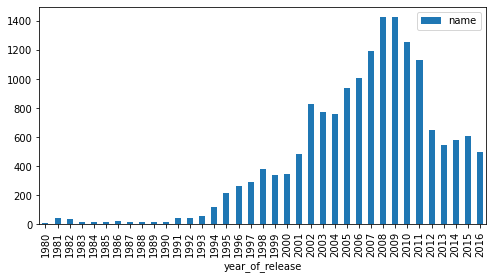

In [21]:
data.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(kind='bar', figsize =(8,4)) 

The largest number of games was produced in 2006-2011 - more than a thousand. In the 80-90s, the minimum number of games was released, moreover, these periods are very far from the date of analysis - they will be irrelevant for further analysis. Games in 2012-2016 were released about 500-650 pieces yearly, which is less than in the years before, however, these periods are close to the date of the analysis and will be relevant.

In [22]:
#3.2
data.pivot_table(index='platform', values='sales_total_mln', aggfunc='sum').sort_values(by='sales_total_mln', ascending=False) #pivot by total sales by platform descending

,sales_total_mln
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


<AxesSubplot:xlabel='platform'>

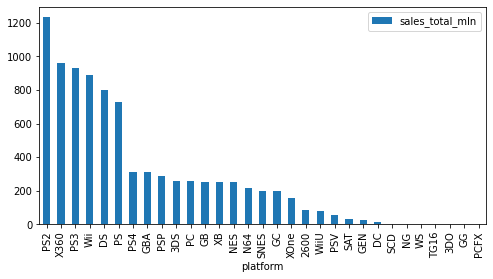

In [23]:
data.pivot_table(index='platform', values='sales_total_mln', aggfunc='sum').sort_values(by='sales_total_mln', ascending = False).plot(kind='bar', figsize =(8,4)) 

<AxesSubplot:xlabel='year_of_release'>

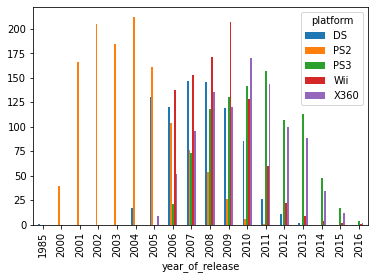

In [24]:
data_top_platforms = data.loc[(data['platform']=='PS2') | (data['platform']=='PS3') | (data['platform']=='X360') | (data['platform']=='Wii') | (data['platform']=='DS') ] #platforms with biggest sales
data_top_platforms_pivot = data_top_platforms.pivot_table(index='year_of_release', columns='platform', values='sales_total_mln', aggfunc='sum') #most popular platforms year by year
data_top_platforms_pivot.plot(kind='bar') #distribution of cost by platforms by years

The most popular platforms are PS2, X360, PS3. However, from the graph of sales by years, it can be seen that the PS2 platform has been popular since the beginning of the 2000s with a peak in 2004, but it began to be gradually replaced by PS3 since 2007, which is obvious from the name of the platforms. The X360 platform is also losing sales - most likely due to the beginning of the XOne era. The DS and Wii platforms have also peaked already and are in the decline. New platforms have been replacing the old ones for about 4-5 years since 2006, going through stages of growth, peak and decline in popularity.

In [25]:
#3.3
#3.4
df=data[data['year_of_release']>2013] #save only relevant years -from 2014 
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16443
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   int64  
 3   genre            1689 non-null   object 
 4   na_sales_mln     1689 non-null   float64
 5   eu_sales_mln     1689 non-null   float64
 6   jp_sales_mln     1689 non-null   float64
 7   other_sales_mln  1689 non-null   float64
 8   critic_score_x   1689 non-null   int64  
 9   user_score_x     1689 non-null   float64
 10  rating           1689 non-null   object 
 11  sales_total_mln  1689 non-null   float64
 12  critic_score_y   1689 non-null   float64
 13  user_score_y     1689 non-null   float64
dtypes: float64(8), int64(2), object(4)
memory usage: 197.9+ KB


Despite the fact that the largest number of sales occurred in 2008-2009 and earlier (2006-2007), in these years, the most sales were on platforms that have lost their relevance (PS2, Wii). Since the PC games industry is quite dynamic, it is suggested to take a short time frame of 3 years (2014-2016). In addition to the fact that 3 years is an adequate period for forecasting in business, starting from 2014, the sales trend is changing - sales of PS3 and X360, popular back in 2013, are falling sharply, which may indicate the emergence of new versions of platforms.

In [26]:
#3.5
df_platform_pivot = df.pivot_table(index='platform', values='sales_total_mln', aggfunc='sum').sort_values(by='sales_total_mln', ascending=False) #pivot by total sale by platform descending
df_platform_pivot 

,sales_total_mln
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


<AxesSubplot:xlabel='year_of_release'>

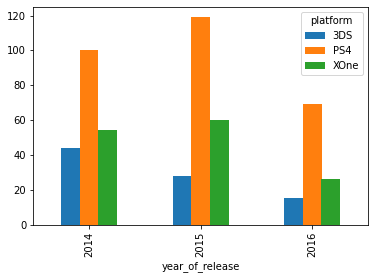

In [27]:
data_other_platforms = df.loc[(df['platform']=='PS4') | (df['platform']=='3DS') | (df['platform']=='XOne') ] #popular platforms, not previously selected, for analysis
data_other_platforms_pivot = data_other_platforms.pivot_table(index='year_of_release', columns='platform', values='sales_total_mln', aggfunc='sum') #other popular platforms year by year
data_other_platforms_pivot.plot(kind='bar') #distribution of cost by platforms by years

The most profitable platforms are **PS4, XOne, 3DS, PS3 and X360**. Graph analysis showed that the PS3, 3DS and X360 platforms are falling, while the PS4 and Xone are growing (growth slows down in 2016, which may be due to the fact that the data for 2016 is not fully updated). Thus, potentially profitable platforms are **PS4, XOne**.

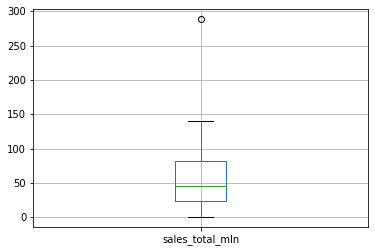

In [28]:
#3.6
df_platform_pivot.boxplot('sales_total_mln') #boxplot for sales_total_mln by platform
plt.show() 

The boxplot shows that almost all platform sales values are within the "whisker range" - that is, they are normal values. The median is around **50** million copies, the value of the outliers is around **300** million copies. Values above the median have lower density (greater spread) than less popular platforms.

Corelation critics - PS4 sales: 0.3514077901256115
Corelation users - PS4 sales: -0.052810732078792146


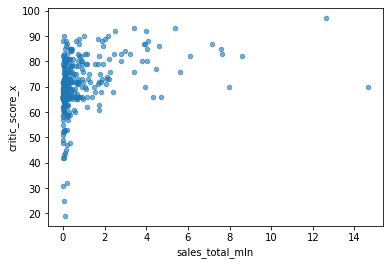

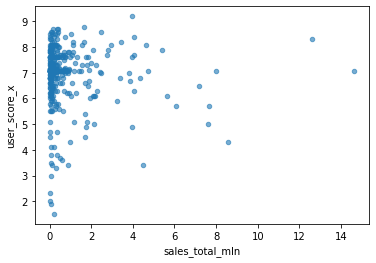

In [29]:
#3.7
ps4 = df[df['platform']=='PS4'] #most popular platform
ax1 = ps4.plot(kind='scatter', x='sales_total_mln', y='critic_score_x', alpha=0.6) #scatterplot for sales-critics 
ax2 = ps4.plot(kind='scatter', x='sales_total_mln', y='user_score_x', alpha=0.6) #scatterplot for sales-users  
ax1
ax2
print("Corelation critics - PS4 sales:", ps4['critic_score_x'].corr(ps4['sales_total_mln'])) 
print("Corelation users - PS4 sales:", ps4['user_score_x'].corr(ps4['sales_total_mln'])) 


The charts show that the top-selling games on PS4 have higher critical ratings: of 65 or higher. An unambiguous conclusion that the number of sales grows with the growth of critics' ratings cannot be made, because there are outliers on the graphs. The correlation between the parameters, although positive, is relatively low and amounts to 35%.
At the same time, there is no correlation between user ratings and game sales, the correlation is even negative: -5%.

Corelation critics - sales other platforms: 0.24851519196503916
Corelation users - sales other platforms: -0.0472569090961724


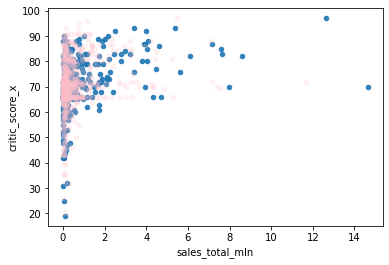

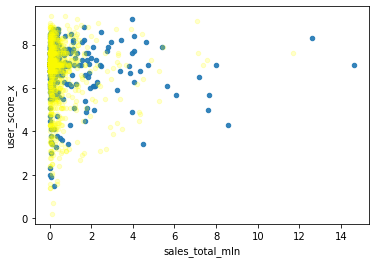

In [30]:
#3.8
not_ps4 = df[df['platform']!='PS4'] #other platforms (apart from PS4)
ax1 = ps4.plot(kind='scatter', x='sales_total_mln', y='critic_score_x', alpha=0.9) #scatterplot sales-critics ps4 
ax2 = ps4.plot(kind='scatter', x='sales_total_mln', y='user_score_x', alpha=0.9) #scatterplot sales-users ps4

not_ps4.plot(kind='scatter', x='sales_total_mln', y='critic_score_x', alpha=0.2, color='pink', ax=ax1) # scatterplot sales-critics on PS4 axis
not_ps4.plot(kind='scatter', x='sales_total_mln', y='user_score_x', alpha=0.2, color='yellow', ax=ax2) #scatterplot sales-users on PS4 axis
print("Corelation critics - sales other platforms:", not_ps4['critic_score_x'].corr(not_ps4['sales_total_mln'])) 
print("Corelation users - sales other platforms:", not_ps4['user_score_x'].corr(not_ps4['sales_total_mln'])) 

The trend noted in step 3.7 can be alsp seen in comparison with other platforms and critics' ratings. User ratings are more unevenly distributed (there are games with low ratings and high sales), as in the case of the PS4 platform, which is reflected in the correlation. The correlation remains with the same signs as for the PS4 platform, but is even lower: 25% for critics and -4.7% for users.

In [31]:
#3.9
display(df.pivot_table(index='genre', values='name', aggfunc='count').sort_values(by='name', ascending=False)) #pivot by number of games by genre - descending
df.pivot_table(index='genre', values='sales_total_mln', aggfunc='median').sort_values(by='sales_total_mln', ascending=False) #pivot by median sales by genre - descending

,name
genre,
Action,619
Role-Playing,221
Adventure,185
Sports,161
Shooter,128
Misc,113
Racing,69
Fighting,60
Simulation,44


,sales_total_mln
genre,
Shooter,0.515
Sports,0.180
Platform,0.140
Fighting,0.125
Role-Playing,0.110
Simulation,0.100
Action,0.090
Misc,0.090
Racing,0.090


<AxesSubplot:xlabel='genre'>

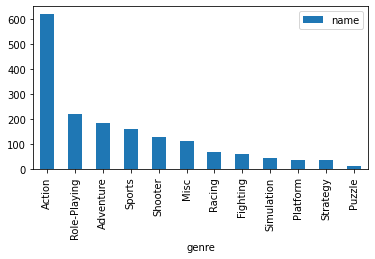

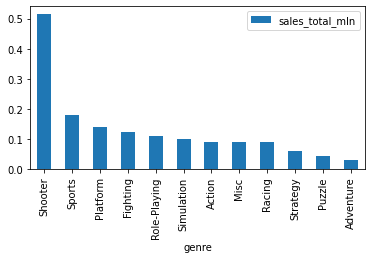

In [32]:
df.pivot_table(index='genre', values='name', aggfunc='count').sort_values(by='name', ascending=False).plot(kind='bar', figsize=(6,3)) 
df.pivot_table(index='genre', values='sales_total_mln', aggfunc='median').sort_values(by='sales_total_mln', ascending=False).plot(kind='bar', figsize=(6,3)) 

As for the genres, the most popular ones in terms of games released are **Action** (600+ games) and **Role-Playing, Adventure, Sports** (160-220 games). Surprisingly, the highest and most stable sales (analysis is based on the median sales) are in the genre that closes the top 5 in terms of the number of games - the **Shooter** genre. Another surprising fact is that the Action and Adventure genres have low sales, but many games (Adventure - even the lowest sales).

### Conclusion
The third step is dedicated to the exploratory data analysis. Individual conclusions are formed above.

<a id='fourth'></a>
## User portrait by region

,na_sales_mln,share
platform,,
PS4,98.61,0.347145
XOne,81.27,0.286102
X360,28.30,0.099627
3DS,22.64,0.079701
PS3,22.05,0.077624


/opt/conda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1583: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


,eu_sales_mln,share
platform,,
PS4,130.04,0.480420
XOne,46.25,0.170866
PS3,25.54,0.094355
PC,17.97,0.066388
3DS,16.12,0.059554


/opt/conda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1583: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


,jp_sales_mln,share
platform,,
3DS,44.24,0.475239
PS4,15.02,0.161349
PSV,14.54,0.156193
PS3,11.22,0.120529
WiiU,7.31,0.078526


/opt/conda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1583: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


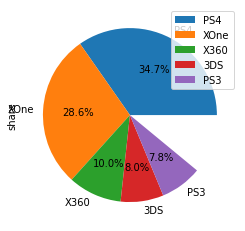

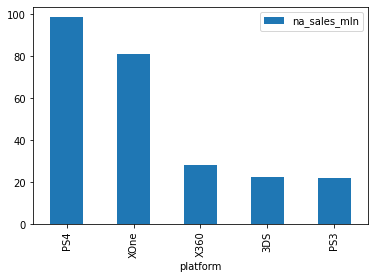

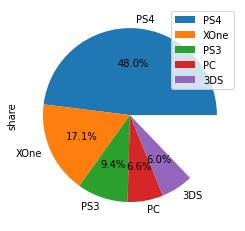

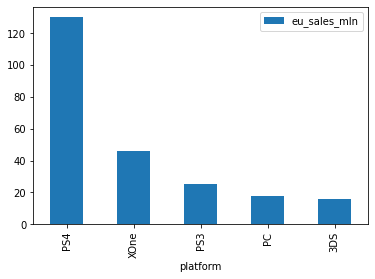

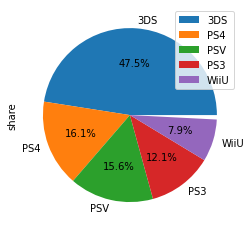

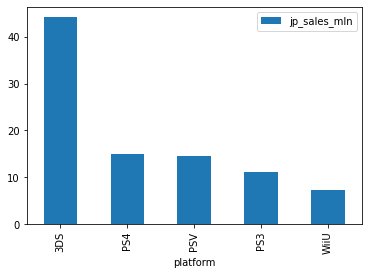

In [33]:
#4.1
columns=['na_sales_mln', 'eu_sales_mln', 'jp_sales_mln'] 
for column in columns: 
    region_top_sales=df.pivot_table(index='platform', values=column, aggfunc='sum').sort_values(by=column, ascending=False) #pivot by platform with column value and sum, sort in descending order
    region_top_sales['share'] = region_top_sales[column]/region_top_sales[column].sum() #add share: value divide by total
    region_top_sales_top5 = region_top_sales.head() #top 5
    display(region_top_sales_top5) 
    region_top_sales_top5.plot(y='share', kind='pie', autopct='%1.1f%%') #graphically -  pie
    region_top_sales_top5.plot(y=column, kind='bar') #graphically - bar

The most popular platforms in North America and Europe are PS4 and XOne, with a combined share of 64%, while in Europe the advantage of PS4 is more pronounced - 48% share versus 35% in America. In Japan, almost half of the market is occupied by 3DS, PS4 is in second place with 16%. The platform with third-fifth place in the West has up to 10%, in Japan 3rd place is held by PSV with 15.6%, fourth place for PS3 with 12.1%. In Japan, the top 5 platforms occupy about 100% of the market, in the West - about 90% of the market.

,na_sales_mln,share
genre,,
Shooter,79.02,0.278181
Action,72.53,0.255333
Sports,46.13,0.162395
Role-Playing,33.47,0.117827
Misc,15.05,0.052982


/opt/conda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1583: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


,eu_sales_mln,share
genre,,
Action,74.68,0.275898
Shooter,65.52,0.242057
Sports,45.73,0.168945
Role-Playing,28.17,0.104071
Racing,14.13,0.052202


/opt/conda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1583: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


,jp_sales_mln,share
genre,,
Role-Playing,31.16,0.334730
Action,29.58,0.317757
Fighting,6.37,0.068428
Misc,5.61,0.060264
Shooter,4.87,0.052315


/opt/conda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1583: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


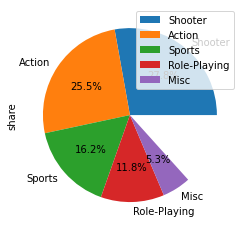

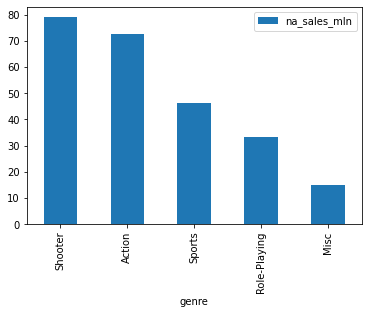

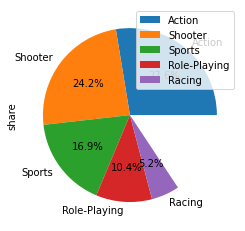

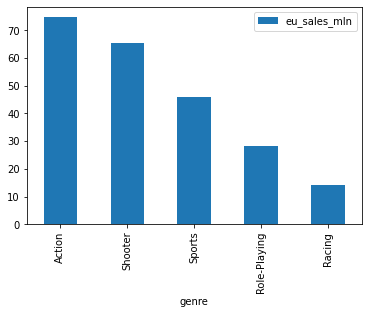

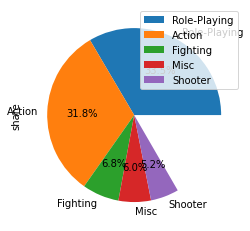

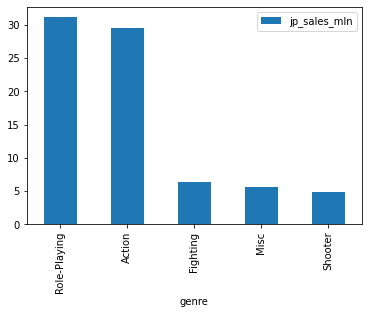

In [34]:
#4.2
for column in columns:  
    region_genre_top_sales=df.pivot_table(index='genre', values=column, aggfunc='sum').sort_values(by=column, ascending=False) #pivot by genre with column value and sum, sort in descending order
    region_genre_top_sales['share'] = region_genre_top_sales[column]/region_genre_top_sales[column].sum() #add share: value divide by total
    region_genre_top_sales_top5 = region_genre_top_sales.head() #top 5
    display(region_genre_top_sales_top5) 
    region_genre_top_sales_top5.plot(y='share', kind='pie', autopct='%1.1f%%') 
    region_genre_top_sales_top5.plot(y=column, kind='bar') 

The most popular genres in North America and Europe are almost identical, the shares are also close: the first 2 positions are for Shooter and Action with shares of 28%-25% and 24%-28%, respectively. The Sports genre takes 3rd place and 16-17% of the market. In Japan, more than a third of the market is occupied by the Role-Playing genre, another third of the market belongs to Action - 32%, genres in third or fifth place have less than 7% share. Popular in the west, Shooter and Sport are far behind in Japan: Shooter took 5th place and a share of 5%, Sport did not make it into the top 5. In each region, the top 5 genres occupy about 83% of the market.

array(['Unknown', 'M', 'E', 'T', 'E10+'], dtype=object)

/tmp/ipykernel_48/2750167886.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['min_age'] = df['rating'].map(min_age) #заполнить колонку min_age значениями из словаря min_age


<AxesSubplot:xlabel='min_age', ylabel='jp_sales_mln'>

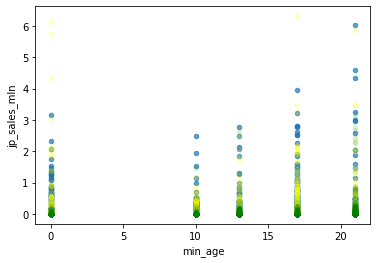

In [35]:
#4.3
display(df['rating'].unique()) 
min_age = {'E': 0, 'EC': 3, 'E10+': 10, 'M': 17, 'T': 13, 'Unknown': 21} #rating - min age
df['min_age'] = df['rating'].map(min_age) #fill min_age 
df_ratings = df.dropna(subset=['min_age']) 

ax1=df_ratings.plot(kind='scatter', x='min_age', y='na_sales_mln', alpha=0.7) 
df_ratings.plot(kind='scatter', x='min_age', y='eu_sales_mln', alpha=0.2, ax=ax1, color='yellow') 
df_ratings.plot(kind='scatter', x='min_age', y='jp_sales_mln', alpha=0.1, ax=ax1, color='green') 

<AxesSubplot:xlabel='min_age', ylabel='jp_sales_mln'>

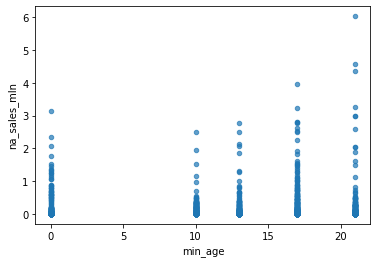

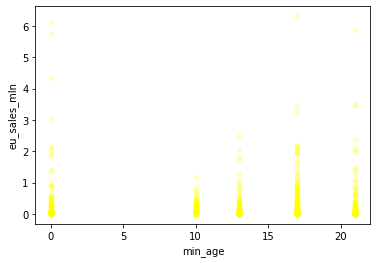

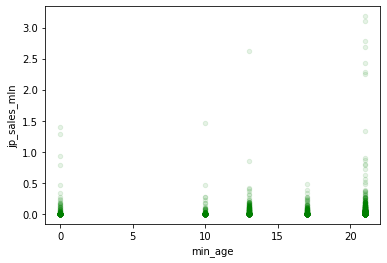

In [36]:
df_ratings.plot(kind='scatter', x='min_age', y='na_sales_mln', alpha=0.7) #separately
df_ratings.plot(kind='scatter', x='min_age', y='eu_sales_mln', alpha=0.2, color='yellow') 
df_ratings.plot(kind='scatter', x='min_age', y='jp_sales_mln', alpha=0.1, color='green')  

For clarity, the Unknown rating was assigned with the age limit of 21 years. According to the distribution graph, it is clear that the highest sales are in the rating of over 17 and unknown, while the age limit of 0 (suitable for all ages) also has a high density, but not the highest sales (excluding Europe). The age limit of 10 and 13 years old has approximately the same distribution, which indicates approximately equal popularity of such games. Thus, the age rating affects the number of sales - the higher the minimum age - the more sales there are. Differences by region are observed: this rule works to a lesser extent in Japan - games without an age limit are more popular there. At the same time, it should be taken into account that many games could not be properly analyzed, because, as age limit is not specified (rating Unknown).

### Conclusion
A user portrait by region was built and analyzed at the fourth step.

<a id='fifth'></a>
## 5. Hypothesis testing

Two hypotheses need to be tested:

1) The average user ratings of the Xbox One and PC platforms are the same; <br/>
2) The average user ratings of the genres Action and Sports are different.

The following null and alternative hypotheses are proposed for the verification: <br/>
1)<br/>
H0: "Average user rating for Xbox One platforms **equals** to average user rating for PC platform" <br/>
H1: "Average user rating for Xbox One platforms **does not equal** to average user rating for PC platform" <br/>

2)<br />
H0: "Average user rating for the Action genre **equals** to the average user rating for the Sports genre" <br/>
H1: "Average user rating for the Action genre **does not equal** to the average user rating for the Sports genre" <br/>

The alternative hypothesis was formulated this way, since there is no condition for the direction of the rating (should it be higher or lower), therefore, the hypothesis can remain two-sided.

The alpha threshold is set to 5%.
The equal_var parameter is planned to be set to False, since the samples are of different sizes and it can be assumed that the variances of the populations of platforms / genres are also different.

In [37]:
#5.1
alpha = .05 
xone= df[df['platform']=='XOne']
pc= df[df['platform']=='PC']


hypothesis_1 = st.ttest_ind(xone['user_score_x'], pc['user_score_x'], equal_var=False) #ttest 
print('p-value:', hypothesis_1.pvalue) 
print('Average user rating of the Xbox One platform :', xone['user_score_x'].mean()) 
print('Average user rating of the PC platform:', pc['user_score_x'].mean()) 


if hypothesis_1.pvalue < alpha: 
    print('Rejecting the null hypothesis') 
else: 
    print('It is not possible to reject the null hypothesis') 

p-value: 0.06469891690556567
Average user rating of the Xbox One platform : 6.72986193513391
Average user rating of the PC platform: 6.451972343877577
It is not possible to reject the null hypothesis


In [38]:
#5.2
action= df[df['genre']=='Action']
sports= df[df['genre']=='Sports']


hypothesis_2 = st.ttest_ind(action['user_score_x'], sports['user_score_x'], equal_var=False) #ttest 
print('p-value:', hypothesis_2.pvalue) 
print('Average user rating - genre Action:', action['user_score_x'].mean()) 
print('Average user rating - genre Sports:', sports['user_score_x'].mean()) 

if hypothesis_2.pvalue < alpha: 
    print('Rejecting the null hypothesis')  
else: 
    print('It is not possible to reject the null hypothesis') 

p-value: 2.0176397088509323e-16
Average user rating - genre Action: 6.91537575873148
Average user rating - genre Sports: 5.589743796002091
Rejecting the null hypothesis


### Conclusion
At the fifth step, two hypotheses were tested and the following conclusions were drawn:

1) Average user ratings for Xbox One and PC platforms are the **same**; <br/>
2) Average user ratings for Action and Sports genres **vary**.

The resulting p-value indicates the probability of getting such a difference or higher by chance. In the first case, **the probability is above the critical level, it is impossible to conclude that there is a significant difference between user ratings**. In the second case - the value is very small - below the critical level - therefore, a choice is made in favor of an alternative hypothesis about the inequality of ratings.

<a id='sixth'></a>
## Summary

In order to forecast ad campaigns for 2017, it makes sense to bet on growing platforms. The study showed that those are PS4 and XOne. At the same time, one should not ignore the most popular PS3 and X360 platforms today - as they are the leaders in the sales overall.
the genres that dominate in terms of the number of sales and have consistently high sales should also be taken into account, especially the Shooter genre.
It is important to take into account the differences across regions. If the behavior of users in the region of North America and Europe is similar in terms of the choice of genres, platforms, games by age limit - in Japan, the preferences differ.
The study also showed that game ratings do not differ critically by genre, while there is a slight correlation between critic ratings and sales, there is no correlation with user ratings.
Also, 2 hypotheses were tested in the study, and it was concluded that the user rating of the Action genre differs from the rating of the Sports genre. At the same time, it was not possible to reject the hypothesis about the equality of user ratings for XOne and PC.